<font color=#760202><center><h1>Projet 5</h1></center> <center><h3>Optimisez la gestion des données d'une boutique</h3></center> 

&nbsp;

## <font color=#2921CA> I - Importation, nettoyage et formatage 
    
&nbsp;    
    
**Pour commencer, j'importe les librairies nécessaires et les fichiers fournis en PJ**
     

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

In [120]:
liaison = pd.read_excel("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 5\\liaison.xlsx")
erp = pd.read_excel("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 5\\erp.xlsx")
web = pd.read_excel("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 5\\web.xlsx")

C:\Users\narab\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\narab\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\narab\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


**Je vais ensuite me pencher sur chacun des dataframes, avoir un premier aperçu de ceux-ci et les nettoyer avant de commencer
mes requêtes**

**Egalement je vais chercher à identifier mes potentielles clés communes pour des futures jointures**

&nbsp;

###  <font color=#009F0C> A - Dataframe "liaison"
    
&nbsp; 
    


In [121]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


**Ce premier dataframe est la table qui regroupe la référence d'un produit** *product_id* **et leur référence web** *id_web* 

In [122]:
liaison.describe(include = 'all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [123]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


**Les premières choses que je note sont :**


- Il y a 825 lignes, 825 valeurs dans *product_id* et 734 valeurs dans *id_web* (tous les produits n'ont pas un id_web associé)


- Les 734 valeurs dans *id_web* sont uniques


- La variable *product_id* est quantitative, or je souhaite qu'elle soit qualitative

In [124]:
liaison['product_id'] = liaison['product_id'].astype('category')
liaison.describe(include='all')

,product_id,id_web
count,825,734
unique,825,734
top,3847,15298
freq,1,1


**Maintenant que** *product_id* **est transformée en variable qualitative, je note également que toutes les valeurs de celle-ci sont uniques**
  

&nbsp;

###  <font color=#009F0C> A - Dataframe "erp"
    
&nbsp;    

In [125]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


**Ici on a un dataframe avec la référence des produits, leur prix et leur état de stock**

*product_id* **sera la clé commune entre "liaison" et "erp"**

In [126]:
erp.describe(include = 'all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [127]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


**Les premières choses que je note sont:**

- Il y a 825 lignes (comme pour "liaison") et il n'y aucune valeurs nulles parmi toutes les variables


- *product_id* est de nouveau de type quantitave au lieu de d'être qualitative

In [128]:
erp['product_id'] = erp['product_id'].astype('category')
erp.describe(include = 'all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.0,825.000000,825.000000,825.000000,825
unique,825.0,NaN,NaN,NaN,2
top,3847.0,NaN,NaN,NaN,instock
freq,1.0,NaN,NaN,NaN,638
mean,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,1.000000,42.000000,34.000000,NaN


**Les valeurs de** *product_id* **sont aussi uniques**



&nbsp;

###  <font color=#009F0C> A - Dataframe "web"
    
&nbsp;    

In [129]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


**Ici on a un dataframe contenant les informations des produits commercialisés en ligne**

**La variable** *sku* **fait référence à la variable** *id_web* **de "liaison" et devrait être notre future clé commune**

**Je commence par renommer** *sku* **en** *id_web*


In [130]:
web = web.rename(columns = {'sku' : 'id_web'})
web.describe(include = 'all', datetime_is_numeric = True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,716,NaN,NaN,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,bon-cadeau-de-25-euros,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,2018-08-22 03:22:17.090908928,...,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,...,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,...,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,...,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [131]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

**Les premières choses que je note sont:**

- Il y a 1513 lignes et 28 variables (plus d'informations que dans les précedents dataframes)


- La variable *id_web* (clé commune avec "liaison") présente des valeurs nulles et 714 valeurs uniques sur 1428 valeurs renseignées (soit la moitié)


- Il y a 4 variables nulles (*tax_class* , *post_content*, *post_password*, *post_content_filtered*), donc inutiles pour la suite


 


**Je vais d'abord suprrimer les 4 variables nulles, puis étudier la variable** *id_web* **(les valeurs nulles et les doublons)**




In [132]:
web = web.drop(columns = ["tax_class","post_content","post_password","post_content_filtered"])

**Je vais commencer par regarder les lignes où** *id_web* **n'est pas renseigné en créant un nouveau dataframe**

In [133]:
web_na = web[web['id_web'].isna()]
web_na.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
web_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  post_title         2 non-null      object        
 11  post_excerpt       2 non-null      object        
 12  post_status        2 non-null      object        
 13  comment_status     2 non-null      object        
 14  ping_stat

In [135]:
web_na.describe(include = 'all', datetime_is_numeric = True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,0,85.0,85.0,85.0,2.0,2.0,2,2.0,2,2,...,2,2,2,2,2.0,2,2.0,2,0,2.0
unique,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,1,2,NaN,NaN,NaN,2,NaN,1,0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,2,1,NaN,NaN,NaN,1,NaN,2,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,...,NaN,NaN,2019-11-02 13:24:08,2019-11-02 12:24:08,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,NaN,NaN,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-02 11:56:28,2018-08-02 09:56:28,...,NaN,NaN,2019-11-02 13:24:04.500000,2019-11-02 12:24:04.500000,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,...,NaN,NaN,2019-11-02 13:24:08,2019-11-02 12:24:08,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-06 11:34:38,2018-08-06 09:34:38,...,NaN,NaN,2019-11-02 13:24:11.500000,2019-11-02 12:24:11.500000,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,NaN,NaN,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,NaN,0.0,NaN,NaN,0.0


**Il y a 85 lignes et je remarque que la plupart des variables contiennent seulement 2 valeurs non nulles et celles avec 85 valeurs non nulles sont des variables quantitatives où toutes les valeurs sont égales à 0**



In [136]:
web_na = web_na.drop(columns = ['id_web','virtual','downloadable','rating_count','post_mime_type'])

In [137]:
web_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   average_rating     2 non-null      float64       
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_author        2 non-null      float64       
 4   post_date          2 non-null      datetime64[ns]
 5   post_date_gmt      2 non-null      datetime64[ns]
 6   post_title         2 non-null      object        
 7   post_excerpt       2 non-null      object        
 8   post_status        2 non-null      object        
 9   comment_status     2 non-null      object        
 10  ping_status        2 non-null      object        
 11  post_name          2 non-null      object        
 12  post_modified      2 non-null      datetime64[ns]
 13  post_modified_gmt  2 non-null      datetime64[ns]
 14  post_pare

**Je garde uniquement les colonnes qui ont 2 valeurs non nulles**

In [138]:
web_na.dropna()

,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
470,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
471,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


**Avec la méthode dropna, je m'aperçois qu'il reste 2 lignes donc que toutes les valeurs non nulles de mes variables étaient concentrées dans les 2 mêmes lignes**

**Les 83 autres lignes sont donc totalement nulles**

**Les lignes où** *id_web* **n'est pas renseignée ne me seront pas utiles**

**Je vais maintenant étudier le cas des doublons de** *id_web*

**Cette fois, je créer un nouveau dataframe en supprimant les lignes où** *id_web* **est nulle**

In [139]:
web_nn = web
web_nn = web_nn[web_nn['id_web'].isna() == False]
web_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   tax_status         714 non-null    object        
 7   post_author        1428 non-null   float64       
 8   post_date          1428 non-null   datetime64[ns]
 9   post_date_gmt      1428 non-null   datetime64[ns]
 10  post_title         1428 non-null   object        
 11  post_excerpt       714 non-null    object        
 12  post_status        1428 non-null   object        
 13  comment_status     1428 non-null   object        
 14  ping_sta

In [140]:
web_nn.describe(include = 'all', datetime_is_numeric = True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1428.0,1428.0,1428.0,1428.0,1428.000000,714,1428.000000,1428,1428,...,1428,1428,1428,1428,1428.0,1428,1428.0,1428,714,1428.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,1,714,NaN,NaN,NaN,1428,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,closed,bon-cadeau-de-25-euros,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,714,NaN,NaN,NaN,...,1428,2,NaN,NaN,NaN,1,NaN,714,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980352,2018-08-22 02:29:08.581232640,...,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,...,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 14:18:27,2018-02-27 13:18:27,...,NaN,NaN,2020-06-18 10:45:06,2020-06-18 08:45:06,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,...,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:39:08,2019-01-31 13:39:08,...,NaN,NaN,2020-08-25 10:35:02,2020-08-25 08:35:02,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,...,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,NaN,0.0,NaN,NaN,0.0


**Dans ce dataframe, il y a 714 valeurs différentes pour** *id_web* **et qui apparaissent au maximum 2 fois, comme il y a 1428 lignes, j'en déduis que ces valeurs de** *id_web* **apparaissent toutes à 2 reprises exactement**

*guid* **présente 1428 valeurs uniques, donc il n'y a aucun doublon**

**Je remarque également plusieurs choses :**


- Il y a 3 variables avec 714 valeurs non nulles et 714 valeurs nulles


- Tout comme dans web_na il y a des variables quantitatives où toutes les valeurs sont égales à 0


- Il y a des variables qualitatives avec une ou deux valeurs uniques

In [141]:
web_nn.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,1428.0,1428.0,1428.0,1428.0,1428.000000,1428.000000,1428.0,1428.0,1428.0
mean,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.515198,0.037411,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


**Ici j'ai toutes mes variables quantitatives et il y en a 7, où toutes les valeurs sont égales à 0, que je vais supprimer**

In [142]:
web_nn = web_nn.drop(columns = ['virtual','downloadable','rating_count','average_rating','post_parent','menu_order','comment_count'])

In [143]:
web_nn.describe(include = 'all', datetime_is_numeric = True)

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,1428,1428.000000,714,1428.000000,1428,1428,1428,714,1428,1428,1428,1428,1428,1428,1428,1428,714
unique,714,NaN,1,NaN,NaN,NaN,711,677,1,1,1,714,NaN,NaN,1428,2,1
top,bon-cadeau-25-euros,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,bon-cadeau-de-25-euros,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,image/jpeg
freq,2,NaN,714,NaN,NaN,NaN,4,12,1428,1428,1428,2,NaN,NaN,1,714,714
mean,NaN,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980352,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,2018-02-27 14:18:27,2018-02-27 13:18:27,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 10:45:06,2020-06-18 08:45:06,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,2019-01-31 14:39:08,2019-01-31 13:39:08,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:35:02,2020-08-25 08:35:02,NaN,NaN,NaN
max,NaN,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


**Je vais également pouvoir supprimer les colonnes qui compte 1428 valeurs identiques**

In [144]:
web_nn = web_nn.drop(columns = ['post_status','comment_status','ping_status'])

In [145]:
web_nn.describe(include = 'all', datetime_is_numeric = True)

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,1428,1428.000000,714,1428.000000,1428,1428,1428,714,1428,1428,1428,1428,1428,714
unique,714,NaN,1,NaN,NaN,NaN,711,677,714,NaN,NaN,1428,2,1
top,bon-cadeau-25-euros,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,bon-cadeau-de-25-euros,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,image/jpeg
freq,2,NaN,714,NaN,NaN,NaN,4,12,2,NaN,NaN,1,714,714
mean,NaN,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980352,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,2018-02-27 14:18:27,2018-02-27 13:18:27,NaN,NaN,NaN,2020-06-18 10:45:06,2020-06-18 08:45:06,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,2019-01-31 14:39:08,2019-01-31 13:39:08,NaN,NaN,NaN,2020-08-25 10:35:02,2020-08-25 08:35:02,NaN,NaN,NaN
max,NaN,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


**Je note qu'il y a 3 variables avec une fréquence de 714**

**Il y en a 2 pour laquelle il y a 714 fois la même valeur et 714 valeurs nulles**

**Pour la dernière,** *post_type*, **il y a 2 valeurs différentes apparaissant 714 fois chacune**  

In [146]:
web_nn['post_type'].unique()

array(['product', 'attachment'], dtype=object)

In [147]:
web_nn.loc[web_nn['post_type']=='product'].describe(include = 'all', datetime_is_numeric = True)

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,714,714.000000,714,714.000000,714,714,714,714,714,714,714,714,714,0
unique,714,NaN,1,NaN,NaN,NaN,711,677,714,NaN,NaN,714,1,0
top,bon-cadeau-25-euros,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,bon-cadeau-de-25-euros,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
freq,1,NaN,714,NaN,NaN,NaN,2,12,1,NaN,NaN,1,714,NaN
mean,NaN,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980608,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,NaN,NaN
max,NaN,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


**Il y a 2 valeurs pour la variable** *post_type* **: "product" et "attachment"**

**On remarque que lorsqu'on filtre** *post_type* **en ne gardant que les valeurs "product", il nous reste encore nos 714** *id_web* **uniques**

In [148]:
web_nn.loc[web_nn['id_web'] == 15298]

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
799,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


**Par** *id_web* **il y a une ligne faisant référence au produit et une ligne faisaint référence à l'image liée à ce produit (attachment)**

**Pour la suite, je ne vais garder que les lignes avec les valeurs "product" dans** *post_type*

In [149]:
web_prod = web_nn.loc[web_nn['post_type']=='product']
web_prod.describe(include = 'all', datetime_is_numeric = True)

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,714,714.000000,714,714.000000,714,714,714,714,714,714,714,714,714,0
unique,714,NaN,1,NaN,NaN,NaN,711,677,714,NaN,NaN,714,1,0
top,bon-cadeau-25-euros,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,bon-cadeau-de-25-euros,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
freq,1,NaN,714,NaN,NaN,NaN,2,12,1,NaN,NaN,1,714,NaN
mean,NaN,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980608,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,NaN,NaN
max,NaN,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


**Je repère les dernières variables qui me seront inutiles pour les supprimer (variables nulles ou avec une unique valeur)**

In [150]:
web_prod = web_prod.drop(columns = ['tax_status','post_type','post_mime_type'])

**Le nettoyage et le formatage des 3 dataframes sont terminés**

**Les variables qui serviront de clés communes sont toutes uniques dans chacun des dataframes**

**Je peux commencer les jointures entre les dataframes**

&nbsp;

## <font color=#2921CA> II - Jointure entre l'ERP et la table d'outil de CMS

&nbsp;    
    
### <font color=#009F0C> A - Jointure entre "liaison" et "erp"
    
&nbsp;    

In [151]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   product_id  825 non-null    category
 1   id_web      734 non-null    object  
dtypes: category(1), object(1)
memory usage: 46.9+ KB


In [152]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    category
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 66.3+ KB


**Ici on a 825 valeurs dans** *product_id* **dans les 2 dataframes**

In [153]:
erp_liaison = pd.merge(erp, liaison, on = 'product_id', how = 'outer')
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    category
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   id_web          734 non-null    object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 79.0+ KB


**Après avoir fait une jointure externe, il y a toujours 825 valeurs dans** *product_id* **(les valeurs étaient donc les mêmes dans les 2 dataframes)**


&nbsp;

### <font color=#009F0C> B - Jointure entre "erp_liaison" et "web_prod"
    
&nbsp;                    

In [154]:
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    category
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   id_web          734 non-null    object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 79.0+ KB


In [155]:
web_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 66.9+ KB


**Ici il y a 734 valeurs dans** *id_web* **pour "erp_liaison" et 714 valeurs dans** *id_web* **pour "web_prod"**

In [156]:
web_erp = pd.merge(web_prod, erp_liaison, on = 'id_web', how = 'outer', indicator = True)
web_erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             734 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
 11  product_id         825 non-null    category      
 12  onsale_web         825 non-null    int64         
 13  price              825 non-null    float64       
 14  stock_quan

In [157]:
web_erp.loc[web_erp['_merge'] != 'both']

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge
714,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4055,0,86.1,0,outofstock,right_only
715,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4090,0,73.0,0,outofstock,right_only
716,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4092,0,47.0,0,outofstock,right_only
717,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4195,0,14.1,0,outofstock,right_only
718,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4209,0,73.5,0,outofstock,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,right_only
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,right_only
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,right_only
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,right_only


**Après avoir fait une jointure externe, il y a 734 valeurs dans** *id_web* **(les 714 valeurs de "web_prod" sont toutes présentes dans "erp_liaison")**

**Dans** *liaison* **il y avait moins de** *id_web* **que de** *product_id*, **après la jointure, je note qu'il y a 20 produits avec un** *id_web* **mais qui ne sont pas dans la table** *web* **et qu'il y a 91 produits sans** *id_web*

**Je décide de garder le dataframe tel quel, en sachant que les produits ne figurant pas dans** *web* **compteront pour 0 lors du calcul du chiffre d'affaire, mais qu'ils seront nécessaires lors de l'étude de la variable** *price*


&nbsp;

## <font color=#2921CA> III - Chiffre d'affaire
    
&nbsp;    

**Le chiffre d'affaire se calcule en multipliant le prix et le nombre de ventes** 

**Avant d'ajouter ma colonne** *CA*, **je remplace les valeurs nulles de** *total_sales* **par 0**

In [158]:
web_erp = web_erp.fillna(value={'total_sales':0})
web_erp['CA'] = web_erp['price'] * web_erp['total_sales']
web_erp.sort_values('CA',ascending = False).head(10)

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA
195,7818,96.0,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,4334,1,49.0,0,outofstock,both,4704.0
72,1662,87.0,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,4144,1,49.0,11,instock,both,4263.0
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,2288.0
71,11641,30.0,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,4142,1,53.0,8,instock,both,1590.0
70,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,4141,1,39.0,1,instock,both,1560.0
202,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,both,1391.5
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,1125.0
80,16237,36.0,2.0,2018-02-13 14:13:53,2018-02-13 13:13:53,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015,2020-07-28 15:25:03,2020-07-28 13:25:03,https://www.bottle-neck.fr/?post_type=product&...,4153,1,29.0,0,outofstock,both,1044.0
651,16580,41.0,2.0,2019-07-24 09:31:48,2019-07-24 07:31:48,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,2020-08-27 08:12:58,https://www.bottle-neck.fr/?post_type=product&...,6206,1,25.2,120,instock,both,1033.2
31,16416,62.0,2.0,2018-02-12 13:42:28,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,https://www.bottle-neck.fr/?post_type=product&...,4068,1,16.6,157,instock,both,1029.2


**Ci-dessus, le top 10 des meilleurs CA, avec notamment les 2 premiers très loin devant avec un CA entre 4k et 5k, le** *Champagne Gosset Grand Blanc de Blancs* **et** *Champagne Gosset Grand Rosé*, **le 3ème CA étant de 2,3k**

**A noter, on retrouve encore du** *Champagne Gosset* **en 4ème et 5ème position**

**Pour obtenir le CA online j'ai juste à prendre la somme de** *CA*

**Pour épurer les informations, je crée également un sous dataframe avec les identifiants et les variables relatives au chiffre d'affaires**

In [159]:
CA_online = web_erp['CA'].sum()
CA_top2 = web_erp['CA'].iloc[[195,72]].sum()
print("Le chiffre d'affaire réalisé en ligne est de",CA_online,"€ \nLe top 2 représente",CA_top2,"€ soit",round(100*CA_top2/CA_online,1),"% du chiffre d'affaire en ligne")

Le chiffre d'affaire réalisé en ligne est de 70568.6 € 
Le top 2 représente 8967.0 € soit 12.7 % du chiffre d'affaire en ligne


In [160]:
web_erp_ca = web_erp[['id_web','product_id','price','total_sales','CA']]
web_erp_ca.head()

,id_web,product_id,price,total_sales,CA
0,bon-cadeau-25-euros,4954,25.0,10.0,250.0
1,15298,3847,24.2,6.0,145.2
2,15296,3849,34.3,0.0,0.0
3,15300,3850,20.8,0.0,0.0
4,19814,4032,14.1,3.0,42.3


&nbsp;  

## <font color=#2921CA> III - Analyse de la variable 'price'

&nbsp;  

**Cette partie va consister à chercher s'il n'y a pas d'erreurs de saisie ou de valeurs aberrantes dans la variable** *price*

In [161]:
web_erp['price'].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

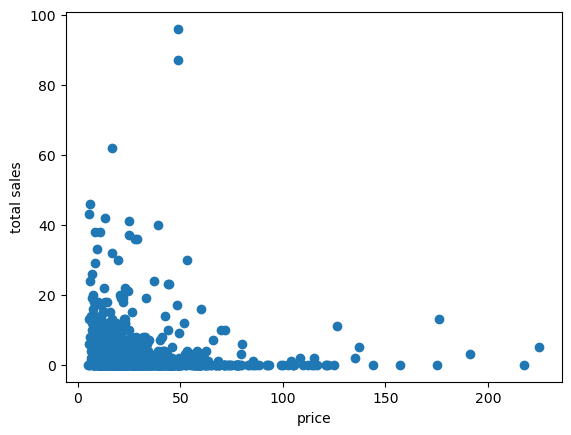

In [162]:
pyplot.scatter(x = web_erp['price'], y = web_erp['total_sales'])
pyplot.xlabel('price')
pyplot.ylabel('total sales')
pyplot.show()

**Ce graphe 'nuage de points' donne un premier aperçu de la répartition du prix (accessoirement avec le nombre de vente)**

**Il y a une forte densité de points au niveau des prix les plus bas, alors qu'au niveau des prix les plus hauts , la densité de points est très faible**


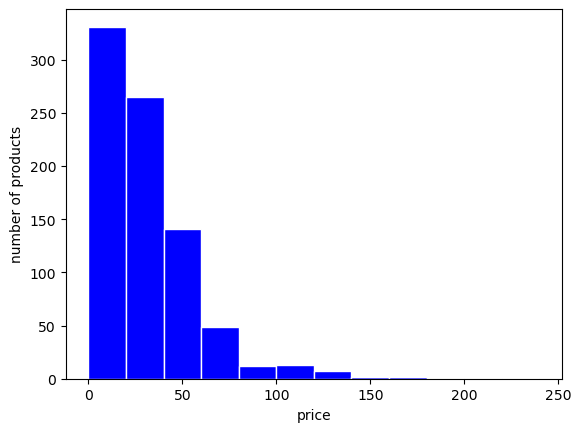

In [163]:
pyplot.hist(web_erp['price'], bins = [0,20,40,60,80,100,120,140,160,180,200,220,240], color = 'blue', edgecolor = 'white')
pyplot.xlabel('price')
pyplot.ylabel('number of products')
pyplot.show()

In [164]:
x = pd.cut(web_erp['price'], bins = [0,20,40,60,80,100,120,140,160,180,200,220,240])
x.value_counts(sort = False)

(0, 20]       334
(20, 40]      270
(40, 60]      135
(60, 80]       48
(80, 100]      12
(100, 120]     12
(120, 140]      7
(140, 160]      2
(160, 180]      2
(180, 200]      1
(200, 220]      1
(220, 240]      1
Name: price, dtype: int64

**Ce graphe 'histogramme' réparti par tranche de 20€, montre une tendance décroissante du nombre de produits en fonction du prix**

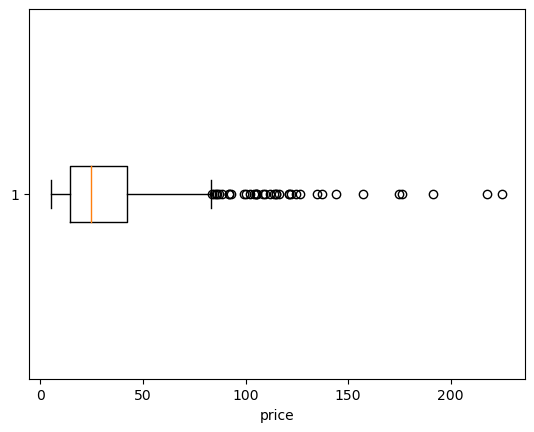

In [165]:
pyplot.boxplot(web_erp['price'], vert = False)
pyplot.xlabel('price')
pyplot.show()

In [166]:
Q1 = np.quantile(web_erp['price'], 0.25)
Q2 = np.quantile(web_erp['price'], 0.5)
Q3 = np.quantile(web_erp['price'], 0.75)
IQR = Q3 - Q1
out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR
print("Un prix inférieur à",round(out_inf,2)," et supérieur à",round(out_sup,2)," est considéré comme outlier")

Un prix inférieur à -26.5  et supérieur à 83.1  est considéré comme outlier


**Grâce à la méthode IQR, on trouve que les prix 'outlier' se situent à partir du seuil de 83.1€**

**Je créer un dataframe avec tous les prix 'outlier' pour chercher plus d'informations à propos de ces produits** 

In [167]:
web_erp_out = web_erp.loc[web_erp['price'] > out_sup]
web_erp_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 64 to 750
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             33 non-null     object        
 1   total_sales        37 non-null     float64       
 2   post_author        33 non-null     float64       
 3   post_date          33 non-null     datetime64[ns]
 4   post_date_gmt      33 non-null     datetime64[ns]
 5   post_title         33 non-null     object        
 6   post_excerpt       33 non-null     object        
 7   post_name          33 non-null     object        
 8   post_modified      33 non-null     datetime64[ns]
 9   post_modified_gmt  33 non-null     datetime64[ns]
 10  guid               33 non-null     object        
 11  product_id         37 non-null     category      
 12  onsale_web         37 non-null     int64         
 13  price              37 non-null     float64       
 14  stock_quan

In [168]:
web_erp_out.sort_values('price',ascending = False)

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,1125.0
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,both,0.0
587,14983,3.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,5892,1,191.3,10,instock,both,573.9
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,2288.0
553,15185,0.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,5767,1,175.0,12,instock,both,0.0
222,7819,0.0,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,4406,1,157.0,3,instock,both,0.0
725,NaN,0.0,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4594,1,144.0,0,outofstock,right_only,0.0
382,14220,5.0,2.0,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,"Ce Corton Charlemagne éblouit par son assise, ...",domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,https://www.bottle-neck.fr/?post_type=product&...,4904,1,137.0,13,instock,both,685.0
642,14923,2.0,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,6126,1,135.0,10,instock,both,270.0
202,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,both,1391.5


**Il y a 37 produits avec un prix outlier, dont 4 sans** *id_web* **(avec peu d'informations)**

**L'information qui nous intéresse ici, c'est le nom des produits (variable post_title)**

In [169]:
web_erp_out['post_title'].dropna().unique()

array(['Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017',
       'Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012',
       'Champagne Egly-Ouriet Grand Cru Millésimé 2008',
       'Champagne Egly-Ouriet Grand Cru Blanc de Noirs',
       "Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011",
       'Cognac Frapin VIP XO', 'Cognac Frapin Château de Fontpinot XO',
       "Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age",
       'Cognac Frapin Cigar Blend',
       'Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014',
       'Domaine Des Croix Corton Grand Cru Les Grèves 2017',
       'Domaine Des Croix Corton Charlemagne Grand Cru 2016',
       'David Duband Charmes-Chambertin Grand Cru 2014',
       'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2014',
       'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2013',
       "Champagne Agrapart &amp; Fils L'Avizoise Extra Brut Blanc de

**Ci-dessus, la liste de tous les produits avec un prix supérieur à 83.1€**

**Dans le commerce de l'alcool, il n'est pas surprenant de trouver des bouteilles "luxueuses" à ces prix là**

**En cherchant sur internet, on peut vérifier que les prix associés à ces produits sont plus ou moins conformes à ceux de notre table**

**Les outliers de** *price* **peuvent être considérés comme des valeurs atypiques mais ce ne sont pas des valeurs aberrantes**


&nbsp; 

## <font color=#2921CA> CONCLUSION

&nbsp; 
 
**Chiffre d'affaire**   

CA en ligne = 70k €

    
Le TOP 5 CA/prod compte 4 Champagnes de la *Maison Gosset*
    
&nbsp;    

**Variable price**

Densité de produits ↘ par rapport au prix
  
    
37 valeurs élevées 'atypiques' compris entre : 83€ - 225€    

&nbsp; 
    
**Exports**
    
*liaison* : 
    
- Certains produits n'ont pas encore d'ID web
    
    
- Quelques produits avec un ID web ne figurent pas dans la base *web*     
 
    
*web* :
    
- 2 produits n'ont pas d'ID web
    
    
- Présence de lignes "fantômes" (valeurs nulles ou égales à 0)
    
    
- Chaque produit compte 2 lignes (product / attachment)
    
    
- Plusieurs variables "inutiles" (valeur identique pour toutes les lignes)
        
    
&nbsp;     
    
**Recommandations**
    
    
- Mettre à jour la base *web* : ajouter les produits avec un ID web associé n'y figurant pas encore, retrouver l'ID web des 2 produits déjà présent dans la base et faire attention aux lignes "fantômes"  
    
    
- Séparer la base *web* en 2 tables : une product et une attachment     
    
    
- Epurer l'une de ces 2 tables (des variables "inutiles") pour facilitier l'exploitation de la base de donnée 
    
    
- Commander du *Champagne Gosset Grand Blanc de Blancs*, il est actuellement en rupture de stock    
